In [60]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.linear_model import LinearRegression
import scipy
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

c:\Users\aless\OneDrive\Desktop\Internship_results


## Script to obtain the results of the fitted gradient boosting models

### Plot performance of different models

Pearson r

In [61]:
models = ["brenda_sabio", "logp", "mw", "pfam"] 
model_names = {"brenda_sabio":"ESM-2 + \n ChemBERTa-2",
               "logp": "LogP",
               "mw": "MW",
               "pfam": "Pfam"}

*Xgboost is trained in HPC and results are copied inside the training_results directory*

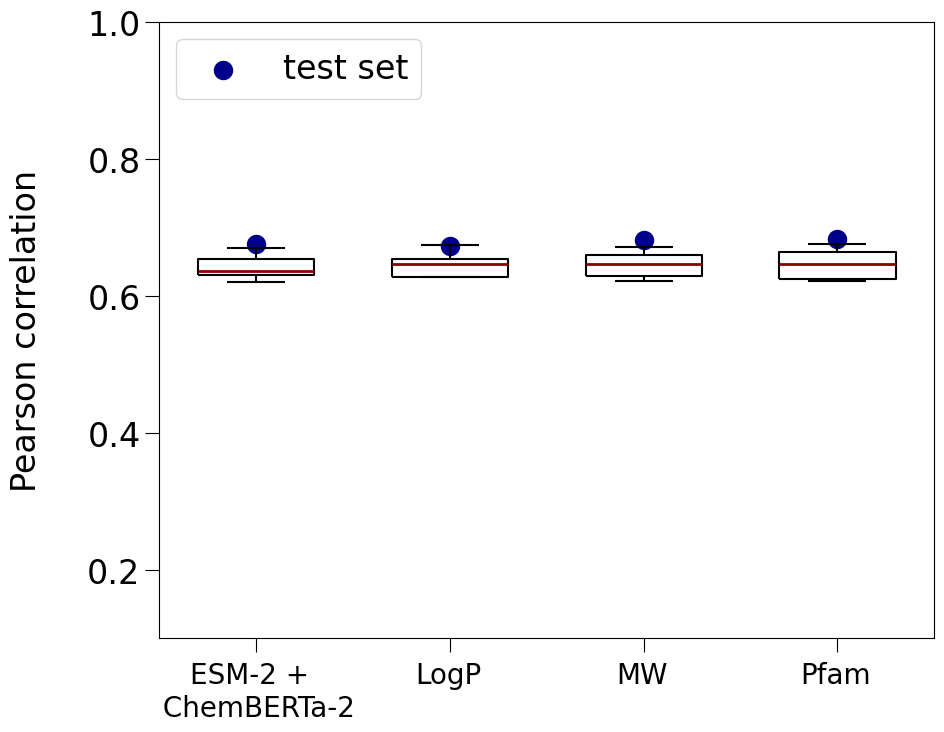

In [62]:
fig, ax = plt.subplots(figsize= (10,8))

plt.rcParams.update({"font.size": 24})
plt.ylim(0.1, 1)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results_additional_input_features", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results_additional_input_features", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results_additional_input_features", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 20)
ax.tick_params(axis='x', which="minor",length=0)


plt.ylabel("Pearson correlation")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper left")
plt.show()


In [63]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

model_pearson = {}

for model in models:
    path = os.path.join("training_results_additional_input_features", f"Pearson_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_pearson[model] = scores
model_pearson

{'brenda_sabio': array([0.62111544, 0.654654  , 0.63131704, 0.67041313, 0.63683517]),
 'logp': array([0.62873477, 0.6549336 , 0.62770433, 0.67472871, 0.64754346]),
 'mw': array([0.62940109, 0.65962565, 0.62288337, 0.67117734, 0.64726859]),
 'pfam': array([0.62504513, 0.66403759, 0.62216516, 0.67617885, 0.64632259])}

Mean Squared Error

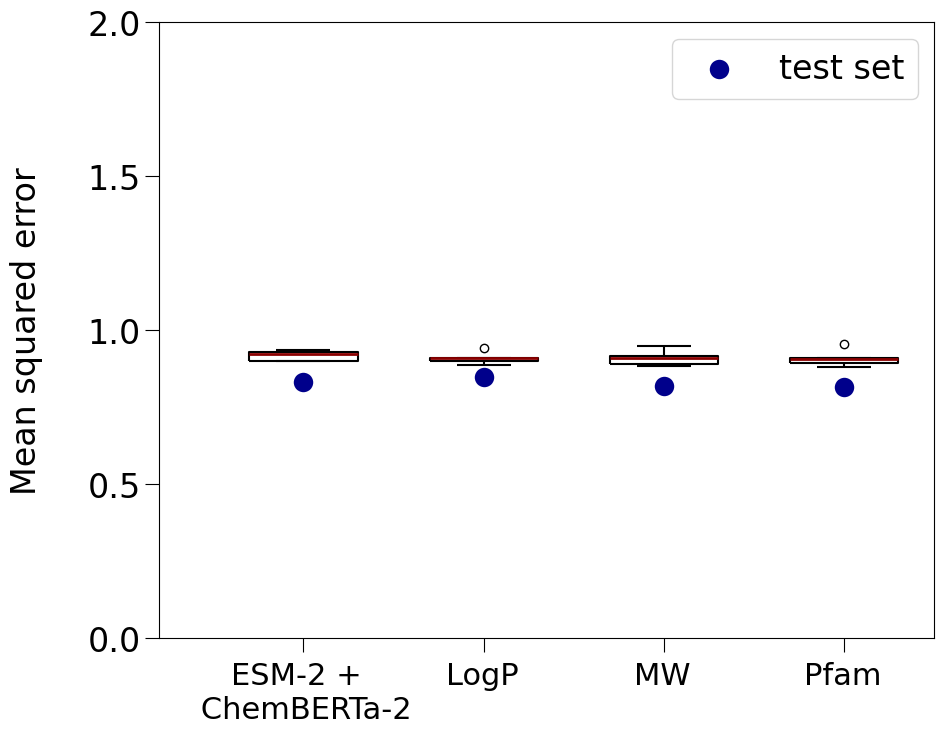

In [64]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({"font.size": 24})

plt.ylim(0.0, 2.0)
plt.xlim(0.2, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join( "training_results_additional_input_features", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join( "training_results_additional_input_features", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join( "training_results_additional_input_features", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join( "training_results_additional_input_features", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})


ax.locator_params(axis="y", nbins=4)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)

ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 22)
ax.tick_params(axis="x", which="minor",length=0)

plt.ylabel("Mean squared error")
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.show()

In [65]:
model_mse_cv = {}

for model in models:
    path = os.path.join("training_results_additional_input_features", f"MSE_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_mse_cv[model] = scores
model_mse_cv

{'brenda_sabio': array([0.90048187, 0.90067871, 0.93644644, 0.92157622, 0.93052576]),
 'logp': array([0.88703418, 0.89867885, 0.94107166, 0.91070766, 0.90868024]),
 'mw': array([0.88492259, 0.88917741, 0.94815166, 0.91673292, 0.90987059]),
 'pfam': array([0.89344761, 0.88011415, 0.95435221, 0.90510277, 0.91005581])}

Coefficients of determination

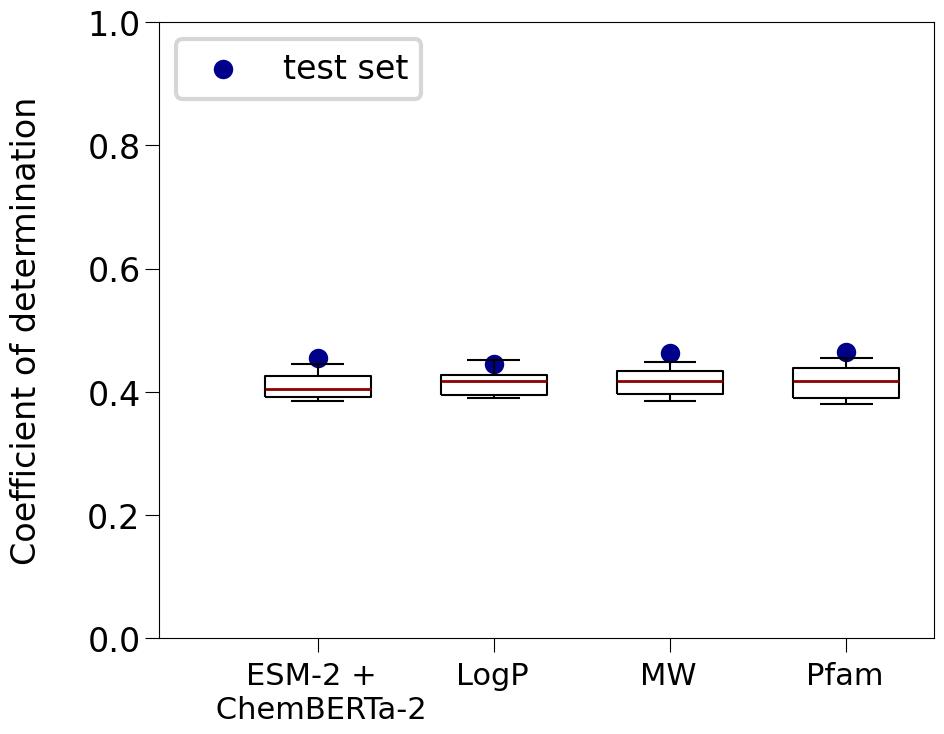

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({"font.size": 24})
plt.ylim(0.0, 1)
plt.xlim(0.1, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results_additional_input_features", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results_additional_input_features", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results_additional_input_features", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8, label="test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8)

    Boxplots.append(R2_CV)
    ticks.append(i+1)

plt.boxplot(Boxplots, positions=ticks, widths=0.6,
           medianprops={"linewidth": 2, "solid_capstyle": "butt", "c": "darkred"},
           boxprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops={"linewidth": 1.5, "solid_capstyle": "butt"})

ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])  
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks) - 0.01)


ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y=-0.03, fontsize= 22)  
ax.tick_params(axis="x", which="minor", length=0)
ax.locator_params(axis="y", nbins=5)

plt.ylabel("Coefficient of determination")
ax.yaxis.set_label_coords(-0.15, 0.5)

leg = plt.legend(loc = "upper left")
leg.get_frame().set_linewidth(3.0)
plt.show()

In [67]:
model_r2_cv = {}

for model in models:
    path = os.path.join("training_results_additional_input_features", f"R2_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_r2_cv[model] = scores
model_r2_cv

{'brenda_sabio': array([0.38533091, 0.42565403, 0.39212335, 0.44489497, 0.4042446 ]),
 'logp': array([0.39451031, 0.42692931, 0.38912097, 0.45144157, 0.41823087]),
 'mw': array([0.39595168, 0.4329882 , 0.38452513, 0.44781229, 0.41746876]),
 'pfam': array([0.39013249, 0.43876767, 0.38050016, 0.45481763, 0.41735018])}

In [68]:
df_metrics = pd.DataFrame()

for model in model_r2_cv.keys():
    for i in range(5):  
        df_metrics = pd.concat([df_metrics, pd.DataFrame({
            'Model': [model],
            'Fold': [i + 1],
            'R2': [model_r2_cv[model][i]],
            'MSE': [model_mse_cv[model][i]],
            'Pearson': [model_pearson[model][i]]
        })], ignore_index=True)

df_metrics.to_csv("df_metrics.csv")
df_metrics

,Model,Fold,R2,MSE,Pearson
0,brenda_sabio,1,0.385331,0.900482,0.621115
1,brenda_sabio,2,0.425654,0.900679,0.654654
2,brenda_sabio,3,0.392123,0.936446,0.631317
3,brenda_sabio,4,0.444895,0.921576,0.670413
4,brenda_sabio,5,0.404245,0.930526,0.636835
5,logp,1,0.394510,0.887034,0.628735
6,logp,2,0.426929,0.898679,0.654934
7,logp,3,0.389121,0.941072,0.627704
8,logp,4,0.451442,0.910708,0.674729
9,logp,5,0.418231,0.908680,0.647543


### Plotting predictions versus experimental values

Loading predictions for the best model (brenda_sabio)

In [69]:
model = "pfam"

pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + model + ".npy"))

data_test = pd.read_pickle(join("partitions_brenda_sabio","test_df.pkl"))

data_test["n_values"] = data_test["log_km"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else [x])
n_values = np.array(data_test["n_values"])

In [70]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(np.float64(0.696583959671493), np.float64(4.972604969649876))

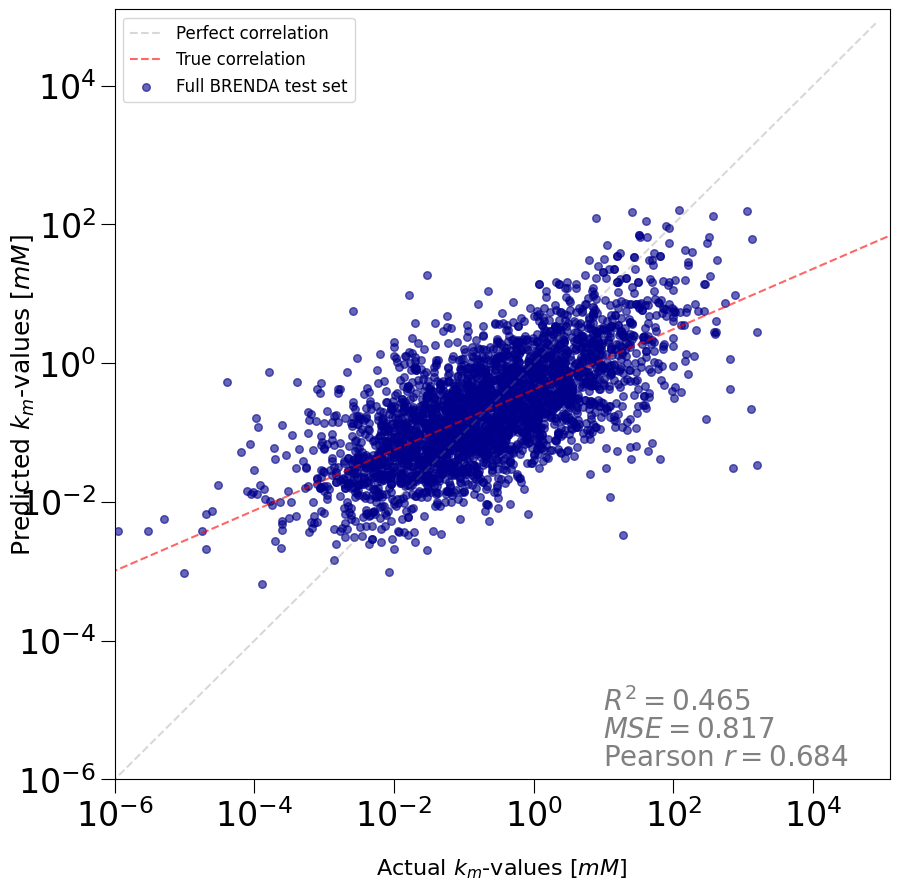

In [71]:
fig, ax = plt.subplots(figsize= (10,10))
plt.rcParams.update({"font.size": 16})


plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.text(1, -5, r'$R^2= 0.465 $', fontsize=20, c = "grey")  
ax.text(1, -5.4, r'$MSE= 0.817 $', fontsize=20, c = "grey")
ax.text(1, -5.8, r'Pearson $r= 0.684 $', fontsize=20, c = "grey") 

ax.yaxis.set_label_coords(-0.1, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-6,-4,-2,0,2,4], ["$10^{-6}$", "$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-6,-4,-2,0,2,4], ["$10^{-6}$","$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])

reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]

plt.plot([-6.5,4.9], [-6.5,4.9], color='grey', alpha = 0.3, linestyle='dashed', label='Perfect correlation')
plt.plot([-6.5,5.1], [beta0 + -6.5*beta1, beta0 + 5.1*beta1], color='red', alpha = 0.6, linestyle='dashed', label='True correlation')

plt.ylabel("Predicted $k_{m}$-values [$mM$]", fontsize = 18)
plt.xlabel("Actual $k_{m}$-values [$mM$]", fontsize = 16)

plt.scatter(test_y, pred_y, alpha = 0.6, s=30, c="darkblue", label="Full BRENDA test set")

plt.savefig(join("figures", "scatter_plot.png"))

leg = plt.legend(loc = "upper left", prop={"size": 12})
plt.show()

Statistical tests

In [72]:
models

['brenda_sabio', 'logp', 'mw', 'pfam']

In [73]:
pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + models[0] + ".npy"))
test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + models[0] + ".npy"))
errors_brenda_sabio = abs(pred_y-test_y)

pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + models[1] + ".npy"))
test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + models[1] + ".npy"))
errors_logp = abs(pred_y-test_y)

pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + models[2] + ".npy"))
test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + models[2] + ".npy"))
errors_mw = abs(pred_y-test_y)

pred_y = np.load(join("training_results_additional_input_features", "y_test_pred_xgboost_" + models[3] + ".npy"))
test_y = np.load(join("training_results_additional_input_features", "y_test_true_xgboost_" + models[3] + ".npy"))
errors_pfam= abs(pred_y-test_y)

In [49]:
d = errors_pfam - errors_brenda_sabio
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with pfam and esm2_ChemBERTa2", p)

d = errors_logp - errors_brenda_sabio
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with logp and esm2_ChemBERTa", p) 

d = errors_mw - errors_brenda_sabio
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with mw and esm2_ChemBERTa", p) 

Difference between predictions with pfam and esm2_ChemBERTa2 0.010399910449035087
Difference between predictions with logp and esm2_ChemBERTa 0.7117060788836871
Difference between predictions with mw and esm2_ChemBERTa 0.0036254520880006436


In [74]:
from scipy.stats import wilcoxon
import itertools
df = df_metrics.copy()

models = df['Model'].unique()

mse_dict = {}
for model in models:
    mse_dict[model] = df[df['Model'] == model].sort_values('Fold')['MSE'].values

# Pairwise Wilcoxon signed-rank test
results = []
for m1, m2 in itertools.combinations(models, 2):
    stat, p = wilcoxon(mse_dict[m1], mse_dict[m2], alternative='two-sided') # m1 is better or worse than m2
    results.append((m1, m2, stat, p))

for m1, m2, stat, p in results:
    print(f"Wilcoxon test between {m1} and {m2}: statistic={stat:.3f}, p-value={p:.4f}")

Wilcoxon test between brenda_sabio and logp: statistic=2.000, p-value=0.1875
Wilcoxon test between brenda_sabio and mw: statistic=3.000, p-value=0.3125
Wilcoxon test between brenda_sabio and pfam: statistic=3.000, p-value=0.3125
Wilcoxon test between logp and mw: statistic=7.000, p-value=1.0000
Wilcoxon test between logp and pfam: statistic=7.000, p-value=1.0000
Wilcoxon test between mw and pfam: statistic=6.000, p-value=0.8125
